In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 案例

## 数据导入

In [2]:
movie = pd.read_csv("../data/IMDB-Movie-Data.csv")
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 电影数据中评分的平均分，导演的人数

In [3]:
# 得出评分的平均分
movie['Rating'].mean()

6.723199999999999

In [4]:
# 得出导演人数信息
movie['Director'].unique().shape[0]

644

In [5]:
# 两种方法都行
np.unique(movie["Director"]).shape[0]

644

## Rating，Runtime (Minutes)的分布情况

### Rating

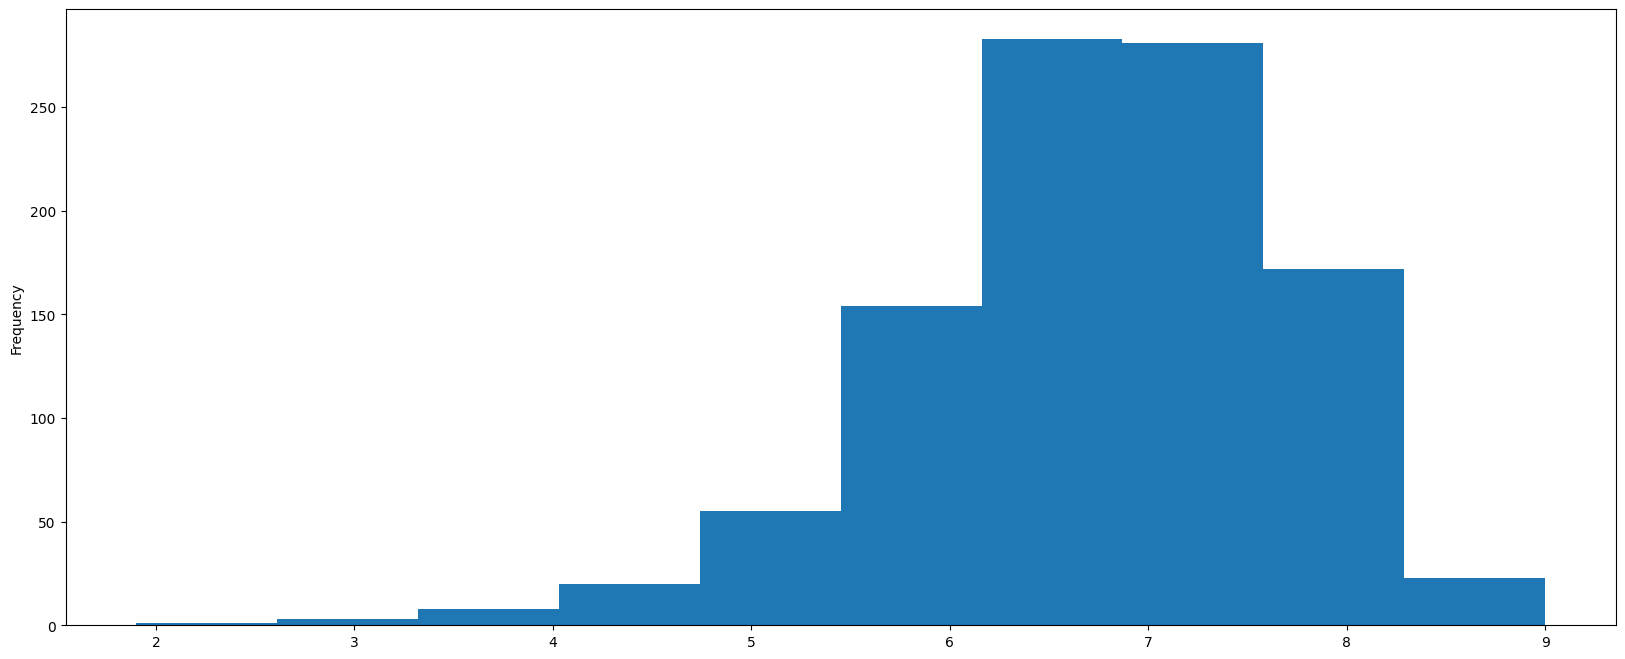

In [6]:
movie['Rating'].plot(kind='hist', figsize=(20, 8))
plt.show()
# 显示不好,地下对不齐

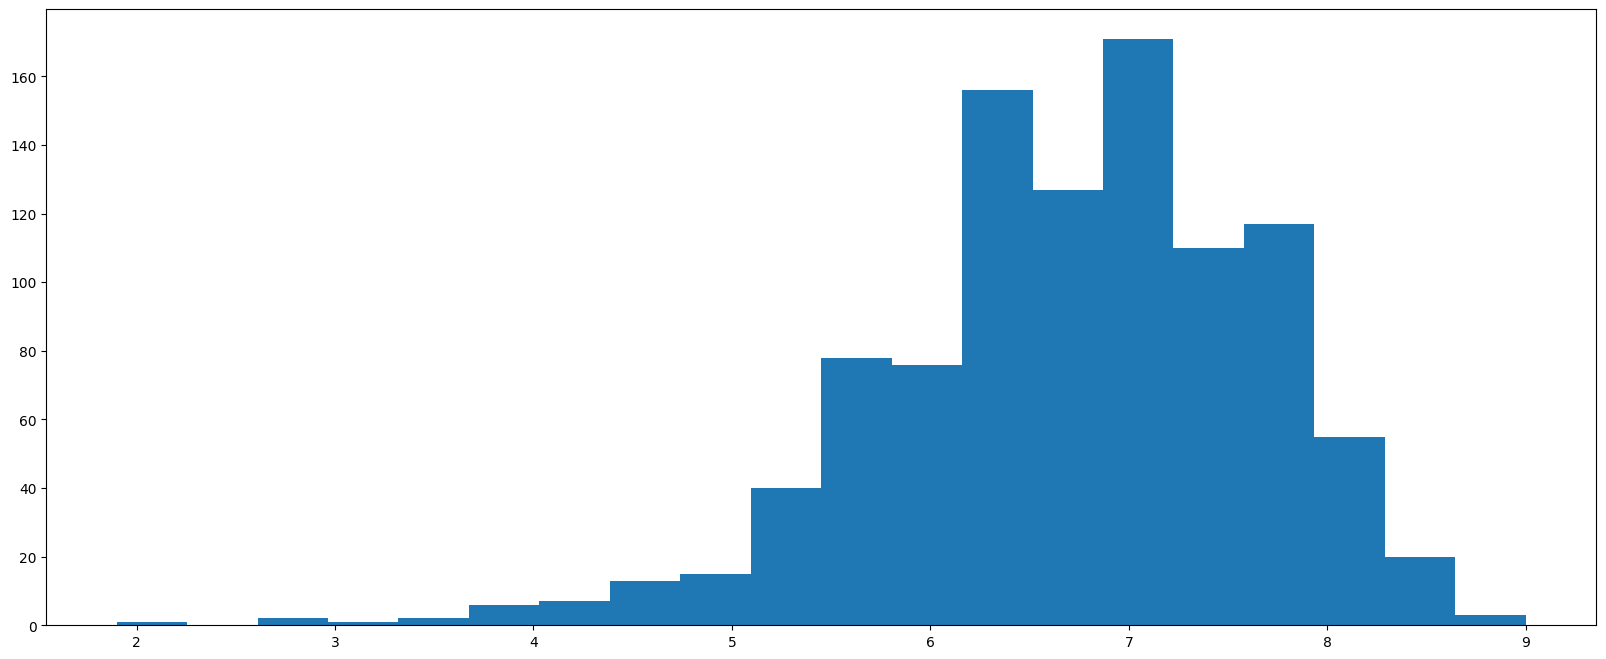

In [8]:
plt.figure(figsize=(20, 8), dpi=100)
plt.hist(movie["Rating"].values, bins=20)
plt.show()
# 显示还是不齐

#### 20条数据,将刻度分为21个

In [9]:
# 求出最大最小值
max = movie['Runtime (Minutes)'].max()
min = movie['Runtime (Minutes)'].min()

# 生成刻度列表 分成21组,放20个数据
t1 = np.linspace(min, max, num=21)
t1

array([ 66.  ,  72.25,  78.5 ,  84.75,  91.  ,  97.25, 103.5 , 109.75,
       116.  , 122.25, 128.5 , 134.75, 141.  , 147.25, 153.5 , 159.75,
       166.  , 172.25, 178.5 , 184.75, 191.  ])

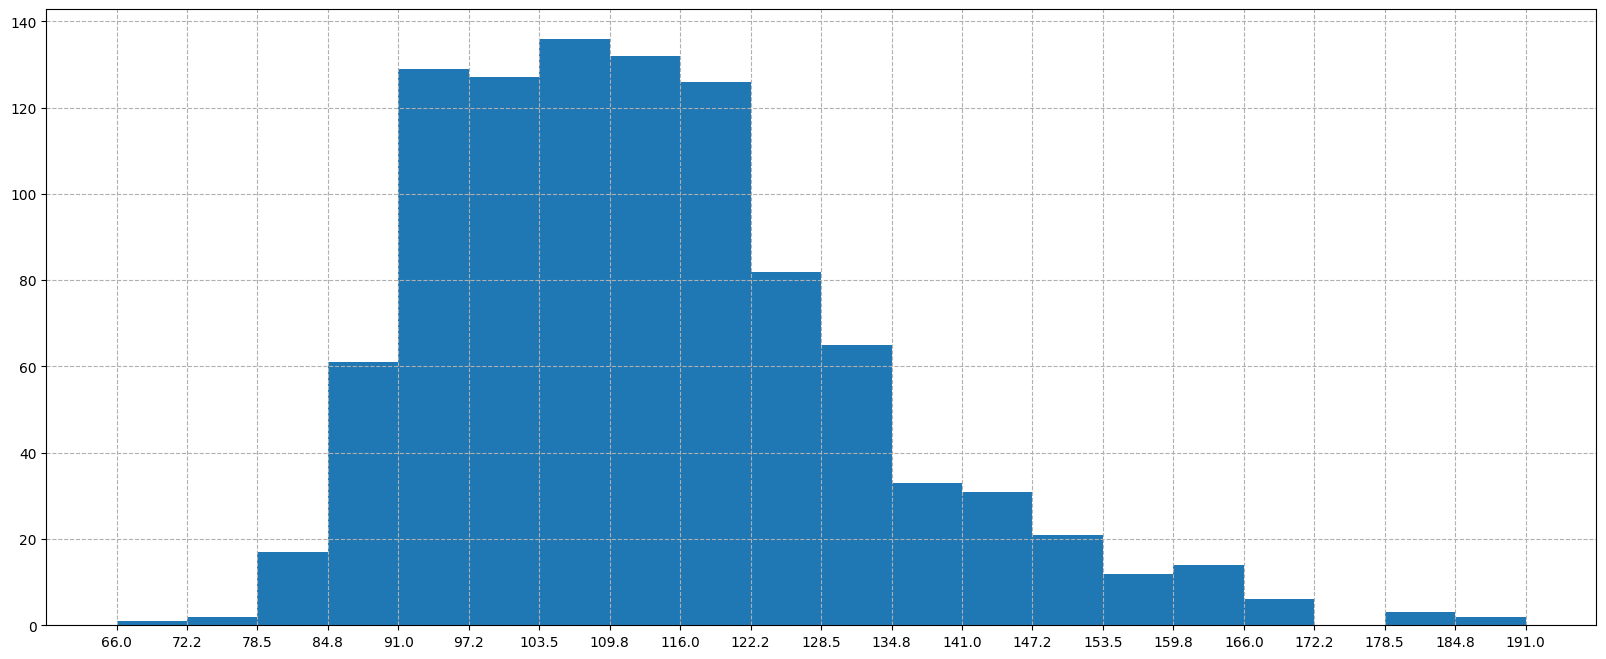

In [10]:
plt.figure(figsize=(20, 8), dpi=100)

# 修改刻度
plt.xticks(t1)

# 添加网格
plt.grid(True, linestyle='--')
plt.hist(movie["Runtime (Minutes)"].values,bins=20)
plt.show()

### Runtime (Minutes)

#### 20条数据,将刻度分为21个

In [11]:
# 求出最大最小值
max = movie['Rating'].max()
min = movie['Rating'].min()

# 生成刻度列表 分成21组,放20个数据
t1 = np.linspace(min, max, num=21)
t1

array([1.9  , 2.255, 2.61 , 2.965, 3.32 , 3.675, 4.03 , 4.385, 4.74 ,
       5.095, 5.45 , 5.805, 6.16 , 6.515, 6.87 , 7.225, 7.58 , 7.935,
       8.29 , 8.645, 9.   ])

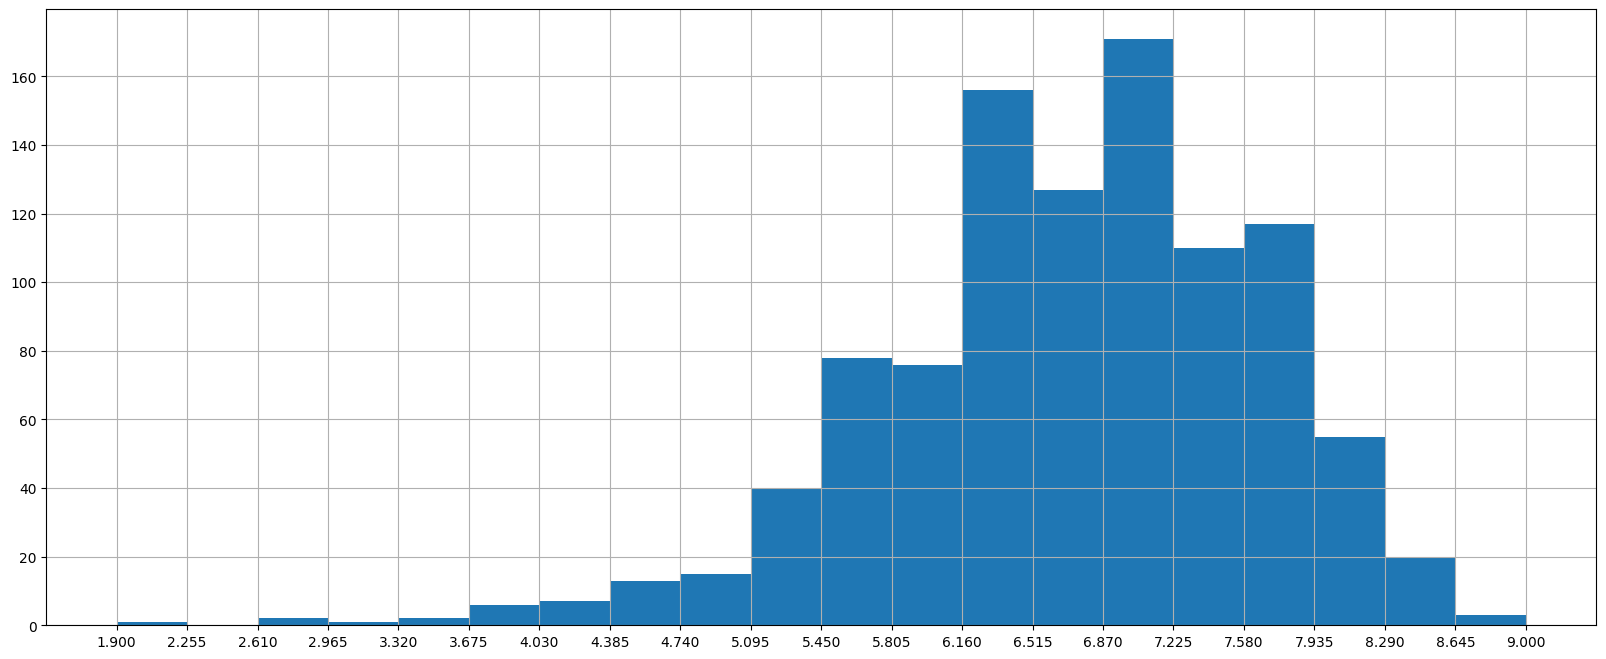

In [12]:
plt.figure(figsize=(20, 8), dpi=100)

# 修改刻度
plt.xticks(t1)

# 添加网格
plt.grid()
plt.hist(movie["Rating"].values,bins=20)
plt.show()

## 电影分类(genre)

### 电影分类

In [13]:
movie['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [14]:
[i for i in movie['Genre']]

['Action,Adventure,Sci-Fi',
 'Adventure,Mystery,Sci-Fi',
 'Horror,Thriller',
 'Animation,Comedy,Family',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Fantasy',
 'Comedy,Drama,Music',
 'Comedy',
 'Action,Adventure,Biography',
 'Adventure,Drama,Romance',
 'Adventure,Family,Fantasy',
 'Biography,Drama,History',
 'Action,Adventure,Sci-Fi',
 'Animation,Adventure,Comedy',
 'Action,Comedy,Drama',
 'Animation,Adventure,Comedy',
 'Biography,Drama,History',
 'Action,Thriller',
 'Biography,Drama',
 'Drama,Mystery,Sci-Fi',
 'Adventure,Drama,Thriller',
 'Drama',
 'Crime,Drama,Horror',
 'Animation,Adventure,Comedy',
 'Action,Adventure,Sci-Fi',
 'Comedy',
 'Action,Adventure,Drama',
 'Horror,Thriller',
 'Comedy',
 'Action,Adventure,Drama',
 'Comedy',
 'Drama,Thriller',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Comedy',
 'Action,Horror,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Adventure,Drama,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Western',
 'Comedy,Drama',
 'Animation,Adventure,

In [15]:
# temp_list 是电影的index行
# 进行字符串分割 电影分类,使用逗号分隔 二维列表
temp_list = [i.split(',') for i in movie['Genre']]
temp_list

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [16]:
# 先是 for j in temp_list, 再然后是 for i in j 取出单独的数据
genre_list = [i for j in temp_list for i in j]
genre_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Comedy',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Crime',
 'Drama',
 'Horror',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Horror',
 'Thriller',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 

In [17]:
# 去重
genre_list = np.unique(genre_list)
genre_list

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller',
       'War', 'Western'], dtype='<U9')

In [18]:
# 行
genre_list.shape

(20,)

In [19]:
# 所有电影的行数     上面电影分类的行
zeros = np.zeros([movie.shape[0], genre_list.shape[0]])
zeros

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# 增加新的列                      列名
temp_movie = pd.DataFrame(zeros, columns=genre_list)
temp_movie.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# 遍历每一部电影，temp_df中把分类出现的列的值置为1
# temp_list 是电影的index行
for i in range(1000):
    temp_movie.loc[i, temp_list[i]]=1
    # 先列后行也行
    #temp_movie[temp_list[i]][i]=1
temp_movie.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# 3、求和,绘图
# 默认对列求和
temp_movie.sum()

Action       303.0
Adventure    259.0
Animation     49.0
Biography     81.0
Comedy       279.0
Crime        150.0
Drama        513.0
Family        51.0
Fantasy      101.0
History       29.0
Horror       119.0
Music         16.0
Musical        5.0
Mystery      106.0
Romance      141.0
Sci-Fi       120.0
Sport         18.0
Thriller     195.0
War           13.0
Western        7.0
dtype: float64

In [23]:
# 排序
temp_movie.sum().sort_values(ascending=False)

Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64

<AxesSubplot: >

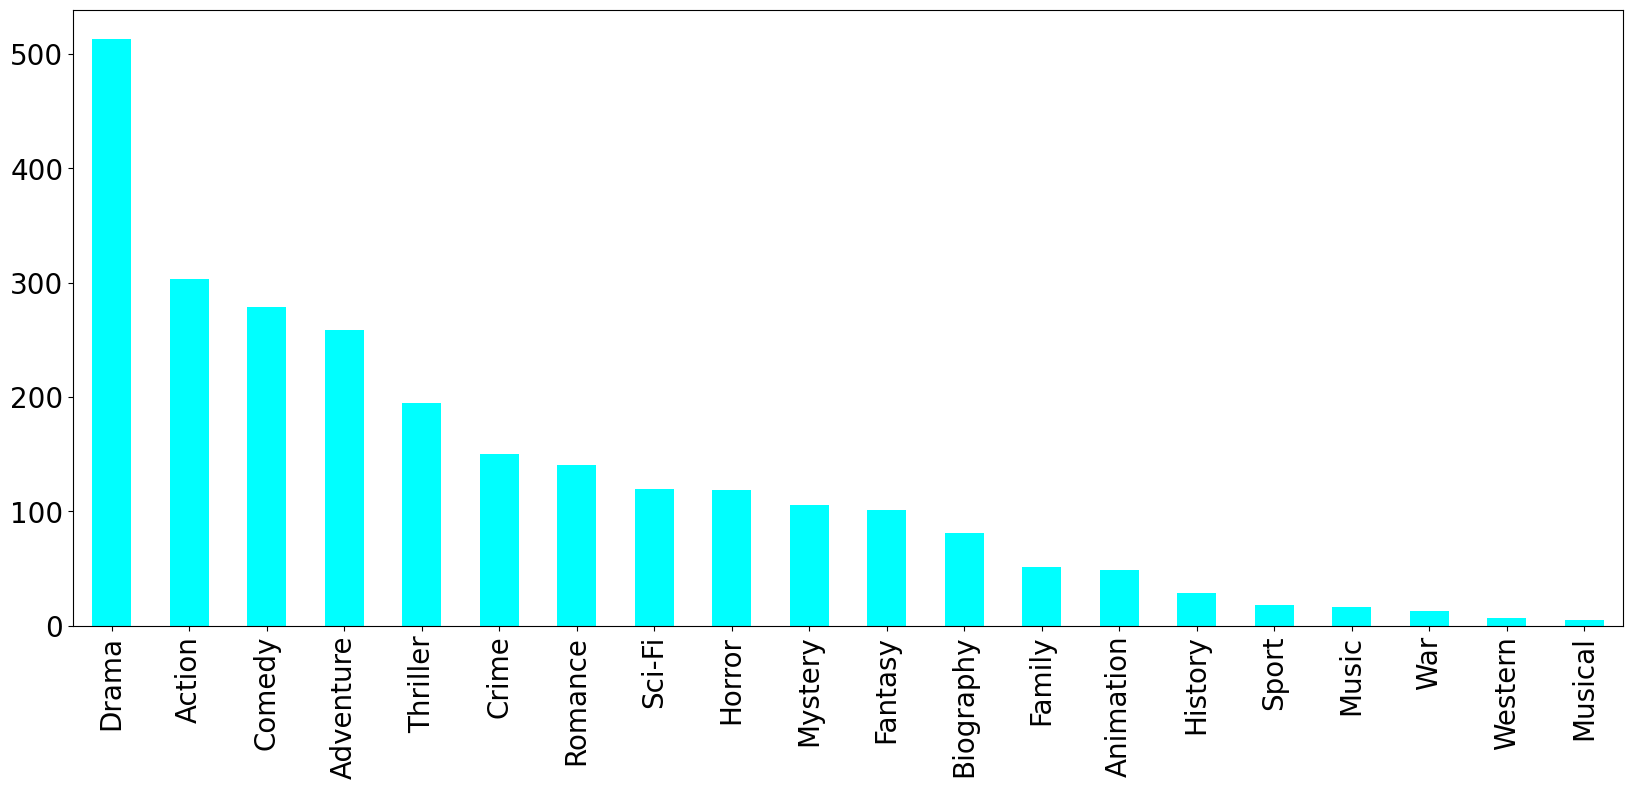

In [24]:
# 画图
temp_movie.sum().sort_values(ascending=False).plot(kind="bar",figsize=(20,8),fontsize=20,colormap="cool")